# Creating Model on dataset using tf and keras

## Loadin Models and Imports

In [89]:
import csv
import numpy as np
import tensorflow as tf
%tensorflow_version 2.x
import os
from sklearn.model_selection import train_test_split
%matplotlib inline
RANDOM_SEED = 42

> **Specify paths**



In [90]:
from google.colab import drive
drive.mount('drive')

if not os.path.isdir("/content/model"): os.mkdir('model')
dataset_filename = "keypoints.csv"
dataset_save_path = os.path.join('model', dataset_filename)
model_filename = "keypoint_classifier.hdf5"
model_save_path = os.path.join('model', model_filename)
MODEL_SAVE_LOCATION_GDRIVE = "/content/drive/My Drive/Colab Notebooks/micro_project"
nn_visual_gdrive_path = os.path.join(MODEL_SAVE_LOCATION_GDRIVE, 'assets/nn.png')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


> **Up Down Left Right Forward Back**

In [49]:
NUM_CLASSES = 6

## Loading keyponts.cvs into local machine model/keypoints.cvs

### Create model directory, and Copying dataset

In [50]:
if not os.path.isdir('model'):
  os.mkdir('model')

In [51]:
if not os.path.isfile(dataset_save_path):
  location_to_dataset_gdrive = os.path.join(MODEL_SAVE_LOCATION_GDRIVE, dataset_filename)
  !cp {location_to_dataset_gdrive.replace(' ', '*')} 'model'

## Loading Keyponts i.e. x-axis

In [52]:
X_dataset = np.loadtxt(
  dataset_save_path,
  delimiter=',',
  dtype='float32',
  usecols=list(range(1, (21 * 2) + 1))
)

## Loading Labels i.e. y-axis

In [53]:
Y_dataset = np.loadtxt(
    dataset_save_path, 
    delimiter=',', 
    dtype='int32', 
    usecols=(0))

## Spliting train and test set 75:1

In [54]:
train_data, test_data, train_label, test_label = train_test_split(
    X_dataset, 
    Y_dataset,
    train_size=0.75, 
    random_state=RANDOM_SEED)


(array([0, 1, 2, 3, 4, 5], dtype=int32), array([20, 20, 20, 20, 20, 20]))


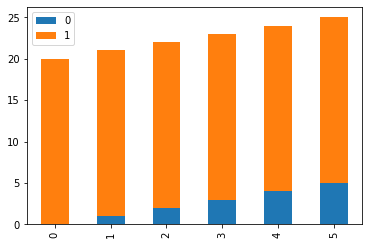

In [55]:
import pandas as pd

counts = np.unique(Y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind='bar', stacked=True)
print(counts)

## Create Sequential Model

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

**Alternative model 1**
Contains no Dropout layers

In [57]:
model_no_dropout = tf.keras.models.Sequential([
      tf.keras.layers.Input((21 * 2)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [58]:
model_no_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Alternative Model 2** Using a using only one hidden layer model

In [59]:
model_single_NN = tf.keras.models.Sequential([
      tf.keras.layers.Input((21 * 2)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [60]:
model_single_NN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Visulation of Keras Model (model)

In [99]:
if not os.path.isdir('assets'):
  !mkdir assets
  !cp {nn_visual_gdrive_path.replace(" ", '*')} /content/assets/

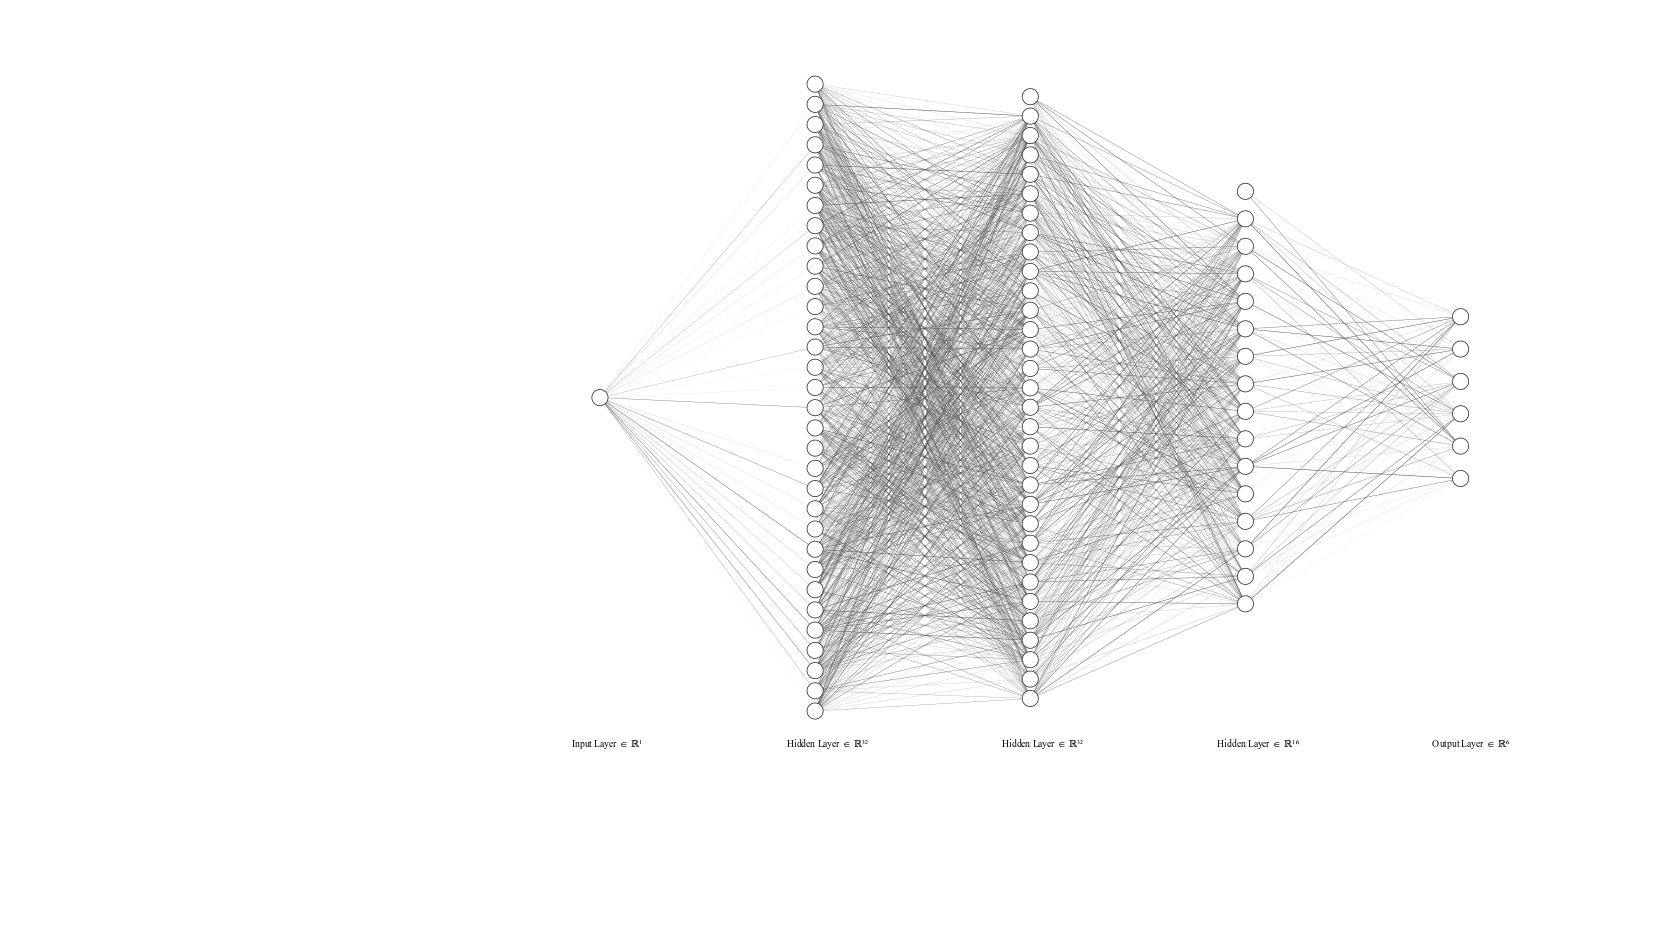

In [100]:
from IPython.display import Image
Image('assets/nn.png')

## Setting up call backs

* Callback to save Modelcheckpoints
* Early stopping with number of epochs to check for no improvement of 50

In [94]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True
)
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

## Compiling method
> *TODO explain adam, loss metric*

In [95]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [96]:
EPOCHS=1000
BATCH_SIZE = 64
STEPS_PER_EPOCH = 100
VALIDATION_DATA_SPLIT = 0.1
history = model.fit(
    train_data, 
    train_label,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[cp_callback, es_callback],
    validation_split=VALIDATION_DATA_SPLIT
)

Epoch 1/1000
100/100 [==============================] - ETA: 0s - loss: 1.5631 - accuracy: 0.4709
Epoch 00001: val_loss improved from inf to 1.30219, saving model to model/keypoint_classifier.hdf5
100/100 [==============================] - 3s 7ms/step - loss: 1.5631 - accuracy: 0.4709 - val_loss: 1.3022 - val_accuracy: 0.8889
Epoch 2/1000
 97/100 [============================>.] - ETA: 0s - loss: 0.9376 - accuracy: 0.7751
Epoch 00002: val_loss improved from 1.30219 to 0.73005, saving model to model/keypoint_classifier.hdf5
100/100 [==============================] - 0s 4ms/step - loss: 0.9320 - accuracy: 0.7751 - val_loss: 0.7300 - val_accuracy: 0.8889
Epoch 3/1000
 99/100 [============================>.] - ETA: 0s - loss: 0.5008 - accuracy: 0.8894
Epoch 00003: val_loss improved from 0.73005 to 0.47204, saving model to model/keypoint_classifier.hdf5
100/100 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.8896 - val_loss: 0.4720 - val_accuracy: 0.8889
Epoch 4/

## Training Model with no dropout layer

In [97]:
history_no_dropout = model_no_dropout.fit(
    train_data, 
    train_label,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    steps_per_epoch=STEPS_PER_EPOCH,
)

Epoch 1/1000
100/100 [==============================] - 1s 4ms/step - loss: 1.5323 - accuracy: 0.6544
Epoch 2/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.7733 - accuracy: 0.9609
Epoch 3/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.9869
Epoch 4/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.1198 - accuracy: 0.9962
Epoch 5/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 1.0000
Epoch 6/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 7/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 8/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 9/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 10/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.005

## Training NN with single hidden NN

In [98]:
history_single_NN = model_single_NN.fit(
    train_data, 
    train_label,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    steps_per_epoch=STEPS_PER_EPOCH,
)

Epoch 1/1000
100/100 [==============================] - 1s 3ms/step - loss: 1.6364 - accuracy: 0.4493
Epoch 2/1000
100/100 [==============================] - 0s 3ms/step - loss: 1.3420 - accuracy: 0.7144
Epoch 3/1000
100/100 [==============================] - 0s 3ms/step - loss: 1.0675 - accuracy: 0.8191
Epoch 4/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.8396 - accuracy: 0.8727
Epoch 5/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.9162
Epoch 6/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.9336
Epoch 7/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.4399 - accuracy: 0.9467
Epoch 8/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.9700
Epoch 9/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.9907
Epoch 10/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.269

In [101]:
history.history['accuracy']

[0.4708642065525055,
 0.7750617265701294,
 0.889629602432251,
 0.9748148322105408,
 0.987407386302948,
 0.9982715845108032,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

# Evalution of models

## Evlautating "model" using test set

In [102]:
val_loss, val_acc = model.evaluate(test_data, test_label, batch_size=BATCH_SIZE)

1/1 [==============================] - 0s 30ms/step - loss: 0.1527 - accuracy: 0.9667


## Table based visulazation | Prediction of test dataset on loaded model

In [109]:
print("Y_pred\t\tY_true\t\tDiff\n")
for i in range(10):
  predict_result = model.predict(np.array([test_data[i]]))
  diff = np.argmax(np.squeeze(predict_result)) - test_label[i]
  print(f"{np.argmax(np.squeeze(predict_result))}\t \
          {test_label[i]}\t \
          {diff}\n \
          ")

Y_pred		Y_true		Diff

2	           2	           0
           
2	           2	           0
           
0	           0	           0
           
2	           2	           0
           
1	           1	           0
           
3	           3	           0
           
3	           3	           0
           
0	           0	           0
           
4	           2	           2
           
5	           5	           0
           


# Confusion matrix to measure quality of model

## **Defination**
  <p> It is an N x N matrix used for evaluation the performance of a classification model, N being number of target classes
  </p>
  <p>Matrix is used to compare actually value with those predicted by the model</p>

![](https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png)

<blockquote>
Suresh, Anuganti.What is a confusion matrix?. https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
</blockquote>

## Recall
* $Recall = \frac{TP}{TP+FN}$

## Precision
* $Precision = \frac{TP}{TP+FP}$

## Accuracy
* $Accuracy = \frac{TP}{Total number} $

## F measure
* <p>It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score.</p>
* <p>It measure both recall and precision using Harmonic Mean, which punishes extereme values more than Arithmetic Mean</p>
* $F-measure = \frac{2*Recall*Precision}{Recall+Precision}$

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

## Compare all models 

In [173]:
CONFUSION_DATASET_NAME = 'keypoints_confusion.csv'
CONFUSION_GDRIVE_PATH = os.path.join('/content/drive/My Drive/Colab Notebooks', 'micro_project' ,CONFUSION_DATASET_NAME)
if not os.path.isfile(os.path.join('model', CONFUSION_DATASET_NAME)):
  !cp {CONFUSION_GDRIVE_PATH.replace(' ', '*')} model

In [174]:
from IPython.display import display, Markdown
import numpy as np

def printmd(text):
  display(Markdown(text))

In [175]:
confusion_dataset_location = os.path.join('model', CONFUSION_DATASET_NAME)
X_confusion = np.loadtxt(
  confusion_dataset_location,
  delimiter=',',
  dtype='float32',
  usecols=list(range(1, (21 * 2) + 1))
)
Y_confusion_label = np.loadtxt(
  confusion_dataset_location,
  delimiter=',',
  dtype='int32',
  usecols=(0)
)

### Model 1 | Using six hidden NN

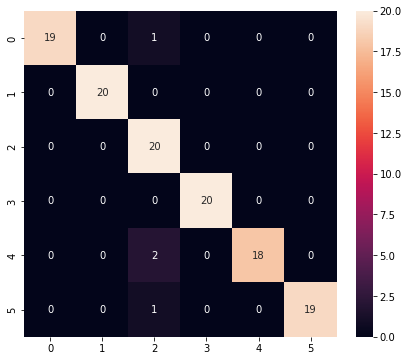

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00        20
           2       0.83      1.00      0.91        20
           3       1.00      1.00      1.00        20
           4       1.00      0.90      0.95        20
           5       1.00      0.95      0.97        20

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Model 2 | Using three hidden NN w/0 dropout layers

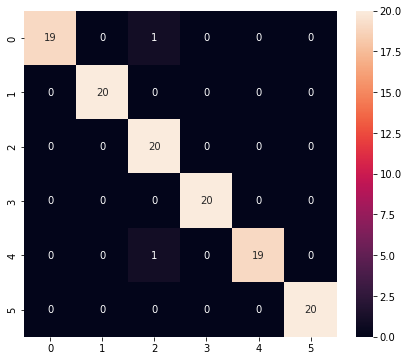

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00        20
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00        20

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### Model 2 | Using one hidden NN

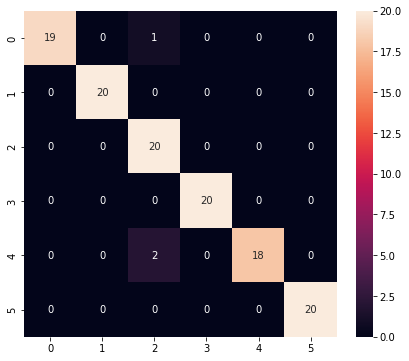

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00        20
           2       0.87      1.00      0.93        20
           3       1.00      1.00      1.00        20
           4       1.00      0.90      0.95        20
           5       1.00      1.00      1.00        20

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.98       120



In [176]:
Y_pred_model = model.predict(X_confusion)
y_pred_model = np.argmax(Y_pred_model, axis=1)

Y_pred_no_drop = model_no_dropout.predict(X_confusion)
y_pred_no_drop = np.argmax(Y_pred_no_drop, axis=1)

Y_pred_single = model_single_NN.predict(X_confusion)
y_pred_single = np.argmax(Y_pred_single, axis=1)

printmd("### Model 1 | Using six hidden NN")
print_confusion_matrix(Y_confusion_label, y_pred_model)
printmd('### Model 2 | Using three hidden NN w/0 dropout layers')
print_confusion_matrix(Y_confusion_label, y_pred_no_drop)
printmd('### Model 2 | Using one hidden NN')
print_confusion_matrix(Y_confusion_label, y_pred_single)

# Copy keypoint_classifier.hdf5 to google drive

In [120]:
if not os.path.isdir(MODEL_SAVE_LOCATION_GDRIVE): 
  os.makedirs(MODEL_SAVE_LOCATION_GDRIVE)

In [ ]:
!cp {model_save_path} {MODEL_SAVE_LOCATION_GDRIVE.replace(" ", '*')}

# Loading a saved model

In [121]:
from google.colab import drive
drive.mount('drive')
location_to_dataset_gdrive = os.path.join(MODEL_SAVE_LOCATION_GDRIVE, model_filename)
print(location_to_dataset_gdrive)
if not os.path.isfile(model_save_path):
  !cp {location_to_dataset_gdrive.replace(' ', '*')} 'model'

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/micro_project/keypoint_classifier.hdf5


In [122]:
loading_model = tf.keras.models.load_model(model_save_path)